Model Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



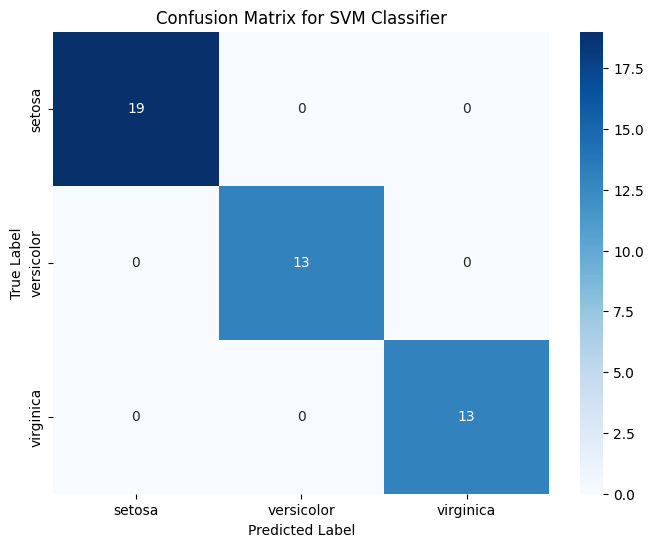

In [1]:
# Iris Flower Classification with SVM
# File name recommendation: Iris_SVM_Multiclass_Classification.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create SVM classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # Linear kernel for better interpretability

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Model evaluation
print("Model Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [2]:
# Test samples for classification (these can be modified or extended)
test_samples = [
    [5.1, 3.5, 1.4, 0.2],  # Expected: setosa
    [6.2, 2.9, 4.3, 1.3],  # Expected: versicolor
    [6.5, 3.0, 5.2, 2.0],  # Expected: virginica
    [5.7, 2.8, 4.5, 1.3],  # Expected: versicolor
    [4.9, 3.0, 1.4, 0.2]   # Expected: setosa
]

# Convert to numpy array
test_samples = np.array(test_samples)

# Make predictions
predictions = svm_model.predict(test_samples)

# Display results
print("\nTest Sample Classifications:")
print("----------------------------")
for i, sample in enumerate(test_samples):
    print(f"Sample {i+1}: {sample} -> Predicted: {target_names[predictions[i]]}")
    
# Optional: Show probabilities (if probability=True was set in SVC)
try:
    probabilities = svm_model.predict_proba(test_samples)
    print("\nClassification Probabilities:")
    print("----------------------------")
    for i, prob in enumerate(probabilities):
        print(f"Sample {i+1}:")
        for j, cls in enumerate(target_names):
            print(f"  {cls}: {prob[j]:.4f}")
except:
    print("\nNote: Probability estimates are not available for this model configuration.")
    print("To enable probability estimates, initialize SVC with probability=True.")


Test Sample Classifications:
----------------------------
Sample 1: [5.1 3.5 1.4 0.2] -> Predicted: setosa
Sample 2: [6.2 2.9 4.3 1.3] -> Predicted: versicolor
Sample 3: [6.5 3.  5.2 2. ] -> Predicted: virginica
Sample 4: [5.7 2.8 4.5 1.3] -> Predicted: versicolor
Sample 5: [4.9 3.  1.4 0.2] -> Predicted: setosa

Note: Probability estimates are not available for this model configuration.
To enable probability estimates, initialize SVC with probability=True.
